In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, lr = None)
model.add_layer(DenseLayer(1, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
pso = PSO(dict(m = 50,
    weight_constraint = [-3, 3], 
    velocity_constraint = [-0.1, 0.1],
    c1 = 2,
    c2 = 2,
    w = 1.4,
    w_decay = 1,
    scale_hyperparameter = False,
    regularizer = None,
    mask = True))

see one see two 2 2


In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = pso, \
    metrics = ['accuracy', 'mean_square_error', 'categorical_crossentropy'])

building layer 1 with 5
24
building layer 2 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\AI-lab\\github_repo\\neural-network\\', 'dataset')
GROUP = 1
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 200
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)

In [8]:
# learning phase
breakpoint = 10
checkpoints = list()
history = list()
for century in range(0, EPOCHS, breakpoint):
    sub_history = model.fit(x_train, y_train, breakpoint, verbose = 0)
    score = model.evaluate(x_test, y_test, False, verbose = 0)
    print('Checkpoint {}, Accuracy: {}, Loss: {}'.format(century+breakpoint, score['accuracy'], score[model.loss_fn]))
    score['checkpoint'] = century + breakpoint
    checkpoints.append(score)
    history.extend(sub_history)

Checkpoint 10, Accuracy: 0.808641975308642, Loss: 0.8515346668384693
Checkpoint 20, Accuracy: 0.845679012345679, Loss: 0.6546032517044632
Checkpoint 30, Accuracy: 0.845679012345679, Loss: 0.5423830526846426
Checkpoint 40, Accuracy: 0.8765432098765432, Loss: 0.4654373592800564
Checkpoint 50, Accuracy: 0.8827160493827161, Loss: 0.44608985053168404
Checkpoint 60, Accuracy: 0.8888888888888888, Loss: 0.4413316514756944
Checkpoint 70, Accuracy: 0.9506172839506173, Loss: 0.3431594283492477
Checkpoint 80, Accuracy: 0.9506172839506173, Loss: 0.3096565670437283
Checkpoint 90, Accuracy: 0.9629629629629629, Loss: 0.2729846989666974
Checkpoint 100, Accuracy: 0.9567901234567902, Loss: 0.21921265566790546
Checkpoint 110, Accuracy: 0.9691358024691358, Loss: 0.208561967920374
Checkpoint 120, Accuracy: 0.9567901234567902, Loss: 0.20018510465268735
Checkpoint 130, Accuracy: 0.9753086419753086, Loss: 0.15614460132740163
Checkpoint 140, Accuracy: 0.9691358024691358, Loss: 0.1535080627158836
Checkpoint 150,

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for xi, yi in zip(x, y_list):
        ax.plot(xi, yi)
    if x_label is not None and y_label is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title='{} VS {}'.format(x_label, y_label))
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()

In [10]:
train_acc = [h['accuracy'] for h in history]
train_mse = [h['mean_square_error'] for h in history]
train_cce = [h['categorical_crossentropy'] for h in history]

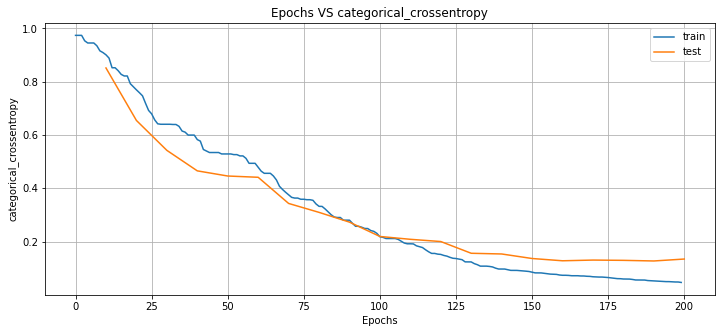

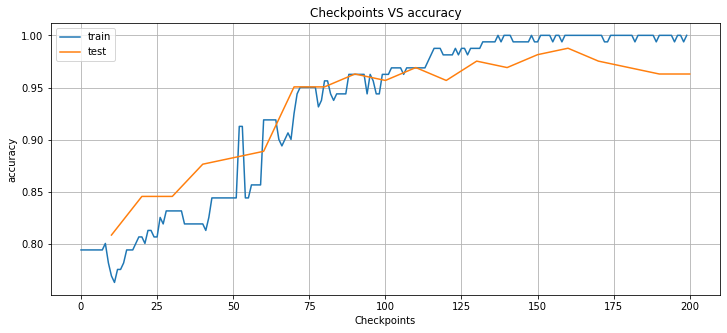

In [11]:
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_cce, [ ckp[model.loss_fn] for ckp in checkpoints ]], x_label = 'Epochs', \
    y_label = model.loss_fn, legend=['train', 'test'])
acc = [ ckp['accuracy'] for ckp in checkpoints ]
draw_plot(x = [[i for i in range(len(history))], [(i+1)*breakpoint for i in range(len(checkpoints))]], y_list = [train_acc, acc], x_label = 'Checkpoints', \
    y_label = 'accuracy', legend=['train', 'test'])

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[0. 0. 1.] <-> [1.0764626e-02 3.7533893e-05 9.8919779e-01]
[0. 0. 1.] <-> [1.0150583e-02 4.1317726e-05 9.8980814e-01]
[1. 0. 0.] <-> [1.9543292e-02 7.0203772e-05 9.8038644e-01]
[1. 0. 0.] <-> [0.9890619  0.00898703 0.00195108]
[1. 0. 0.] <-> [0.9889649  0.00548227 0.00555279]
[1. 0. 0.] <-> [0.9891289  0.00809631 0.00277481]
[1. 0. 0.] <-> [0.9932198  0.00529521 0.00148498]
[1. 0. 0.] <-> [9.6776474e-01 3.1611327e-02 6.2387454e-04]
[1. 0. 0.] <-> [0.99236566 0.00534491 0.0022894 ]
[1. 0. 0.] <-> [0.95773333 0.04048653 0.00178014]
[1. 0. 0.] <-> [0.9934384  0.00536595 0.00119566]
[1. 0. 0.] <-> [0.98200077 0.00617383 0.01182546]
[1. 0. 0.] <-> [0.9815677  0.01733844 0.00109379]
[0. 0. 1.] <-> [1.0897799e-02 3.8125883e-05 9.8906404e-01]
[1. 0. 0.] <-> [9.231706e-01 7.620468e-02 6.246997e-04]
[1. 0. 0.] <-> [0.9844014  0.00456399 0.0110346 ]
[1. 0. 0.] <-> [0.99054104 0.00800883 0.00145015]
[0. 1. 0.] <-> [1.6290590e-02 9.8365778e-01 5.1609695e-05]
[0. 1. 0.] <-> [1.9199945e-02 9.8073673e

In [13]:
for checkpoint in checkpoints:
    print(checkpoint, '\n\n')

{'accuracy': 0.808641975308642, 'mean_square_error': 0.48637214797479644, 'categorical_crossentropy': 0.8515346668384693, 'essential_metrics': {0: {'tp_hit': 73, 'fp_hit': 15, 'tn_hit': 13, 'fn_hit': 7}, 1: {'tp_hit': 0, 'fp_hit': 16, 'tn_hit': 77, 'fn_hit': 15}, 2: {'tp_hit': 4, 'fp_hit': 0, 'tn_hit': 95, 'fn_hit': 9}}, 'checkpoint': 10} 


{'accuracy': 0.845679012345679, 'mean_square_error': 0.36411553426397814, 'categorical_crossentropy': 0.6546032517044632, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 15, 'tn_hit': 13, 'fn_hit': 2}, 1: {'tp_hit': 0, 'fp_hit': 9, 'tn_hit': 84, 'fn_hit': 15}, 2: {'tp_hit': 5, 'fp_hit': 1, 'tn_hit': 94, 'fn_hit': 8}}, 'checkpoint': 20} 


{'accuracy': 0.845679012345679, 'mean_square_error': 0.30755709365213474, 'categorical_crossentropy': 0.5423830526846426, 'essential_metrics': {0: {'tp_hit': 78, 'fp_hit': 12, 'tn_hit': 16, 'fn_hit': 2}, 1: {'tp_hit': 4, 'fp_hit': 13, 'tn_hit': 80, 'fn_hit': 11}, 2: {'tp_hit': 1, 'fp_hit': 0, 'tn_hit': 95, 'fn_h

In [14]:
print(model)

Layer 1
Neuron 0: weights:
[-0.42022014  3.          2.3073022  -0.9293042  -3.        ]
 bias: 3.0

Neuron 1: weights:
[ 1.2065036 -3.        -3.        -2.8227324  3.       ]
 bias: 2.5412397384643555

Neuron 2: weights:
[ 3.         -2.2479427  -0.0446264   1.2924657   0.43693957]
 bias: 2.358133554458618

Neuron 3: weights:
[-1.0860932   2.9434767  -1.2714701  -0.95802885 -2.625119  ]
 bias: 1.7832450866699219

$
Layer 2
Neuron 0: weights:
[2.7676616  3.         0.53287524 3.        ]
 bias: -3.0

Neuron 1: weights:
[ 3. -3. -3.  3.]
 bias: 0.873848557472229

Neuron 2: weights:
[-3.          0.67582005  1.3777487  -3.        ]
 bias: 3.0

$

